Getting weird results with my new emus, trying to sanity test what I have. 

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

In [31]:
import h5py
from os import path
import numpy as np

In [32]:
aemulator_dir = '/home/users/swmclau2/scratch/Aemulators/'

In [44]:
#ds_hod = h5py.File(path.join(aemulator_dir, 'ds_zheng07_h/PearceDsCosmo.hdf5'), 'r')
#ds_hod = h5py.File(path.join(aemulator_dir, 'ds_zheng07/PearceDsCosmo.hdf5'), 'r')
ds_hod = h5py.File(path.join(aemulator_dir, 'ds_hsab_h/PearceHSABDsCosmo.hdf5'), 'r')

In [48]:
#ds_hod_test = h5py.File(path.join(aemulator_dir, 'ds_zheng07_test_h/PearceDsCosmoTest.hdf5'), 'r')
#ds_hod_test = h5py.File(path.join(aemulator_dir, 'ds_zheng07_test/PearceDsCosmoTest.hdf5'), 'r')
ds_hod_test = h5py.File(path.join(aemulator_dir, 'ds_hsab_test_h/PearceHSABDsCosmoTest.hdf5'), 'r')

In [49]:
ds_hod.attrs['cosmo_param_names']

array(['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8'], 
      dtype='|S6')

In [50]:
ds_hod_test.attrs['cosmo_param_names']

array(['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8'], 
      dtype='|S6')

In [51]:
ds_hod_data = np.zeros((40, 1000, 18))
for i in xrange(40):
    ds_hod_data[i] = ds_hod['cosmo_no_%02d'%i]['a_1.000']['obs'][()]

In [52]:
ds_hod_test_data = np.zeros((35, 100, 18))
for i in xrange(35):
    ds_hod_test_data[i] = ds_hod_test['cosmo_no_%02d'%i]['a_1.000']['obs'][()]

In [53]:
r_bins = np.logspace(-1, 1.6, 19)
rbc = (r_bins[1:] +r_bins[:-1])/2.0

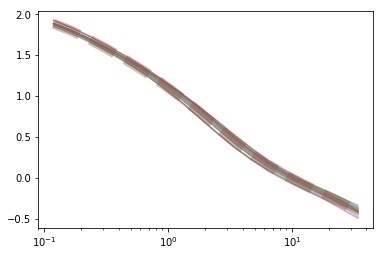

In [54]:
N = 1
for i in xrange(0,35,N):
    plt.plot(rbc, ds_hod_test_data[i:i+N].mean(axis = (0,1)), label = i, alpha = 0.3)

denom = ds_hod_data.mean(axis = (0,1))
#plt.legend(loc='best')
plt.plot(rbc, denom, ls = '--', lw=10, alpha = 0.4)
plt.xscale('log')

In [55]:
np.any(np.all(ds_hod_data==0.0, axis = 2))

False

In [56]:
np.any(np.all(ds_hod_test_data==0.0, axis = 2))

False

In [57]:
from pearce.mocks.kittens import TrainingBox

ImportError: /lib64/libstdc++.so.6: version `GLIBCXX_3.4.21' not found (required by /home/users/swmclau2/.local/lib/python2.7/site-packages/halotools-0.7.dev5048-py2.7-linux-x86_64.egg/halotools/mock_observables/pair_counters/cpairs/pairwise_distances.so)

In [58]:
cat = TrainingBox(0)

NameError: name 'TrainingBox' is not defined

In [ ]:
cat.load(1.0, HOD='zheng07', particles=True)#, hod_kwargs={'sec_haloprop_key':'halo_local_density_10'})

In [ ]:
ds_hsab.attrs['hod_param_vals'][1]

In [ ]:
hod_pnames = ds_hsab.attrs['hod_param_names']
hod_dict = dict(zip(hod_pnames, ds_hsab.attrs['hod_param_vals'][1]))

In [ ]:
hod_dict

In [ ]:
ds_hsab_data.shape

In [ ]:
cat.populate(hod_dict, min_ptcl=20)

In [ ]:
ds = cat.calc_ds(r_bins, n_cores = 1)

In [ ]:
ds

In [ ]:
denom = ds_hsab_data.mean(axis = (0,1))
plt.plot(rbc, ds_hsab_data[0,1])
plt.plot(rbc, np.log10(ds) )

plt.xscale('log')